In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
from copy import copy
from time import time
from tqdm.notebook import tqdm
from multiprocessing import Pool
from simulation import Simulation_Base
from mip_solver import MIP_solver

class Simulation_B(Simulation_Base):
    number = 1
    
    def __init__(self, silent=False):
        Simulation_Base.__init__(self, number=self.number, silent=silent)
        
    def compute_best_libs_and_order(self):
        ind_libs_sorted = np.argsort(self.lib_days)
        days = 0
        self.ind_libs_best = []
        for lib in ind_libs_sorted:
            days += self.lib_days[lib]
            if days < self.num_days:
                self.ind_libs_best.append(lib)
            else:
                break
        
    def compute_best_books(self):
        self.mip = MIP_solver(self)
        self.solution = self.mip.get_optimal_books_for_ordered_libs(self.ind_libs_best)
        
    def run(self):
        t0 = time()
        self.compute_best_libs_and_order()
        t1 = time()
        print("computing best libs done: ", t1-t0)
        self.compute_best_books()
        t2 = time()
        print("computing best order and books done: ", t2-t1)
        
        
sim = Simulation_B()
sim.run()
print(sim.get_score())
# sim.write()

computing best libs done:  0.000102996826171875
computing best order and books done:  15.796319961547852
5822900


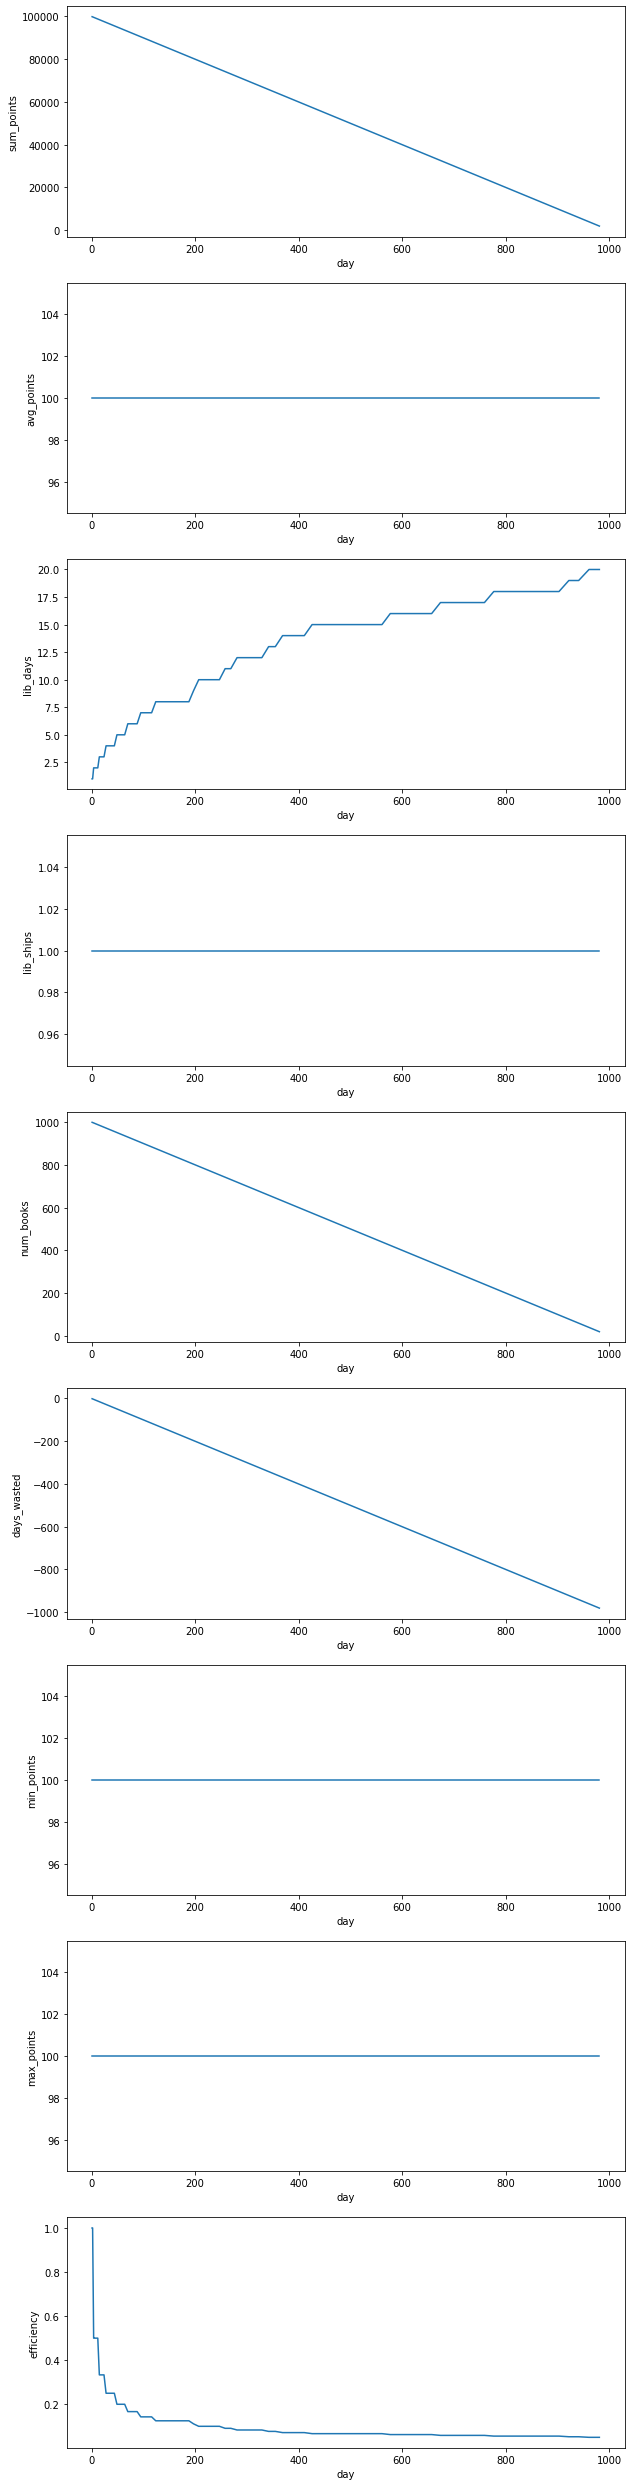

In [5]:
sim.plot_solution()